# Kaggle Competition: House Prices: Advanced Regression Techniques

El objetivo de [esta competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) es **predecir el precio de las casas** en Ames, Iowa, utilizando un conjunto de datos de entrenamiento que contiene 79 variables. La métrica de evaluación es el **error cuadrático medio** (RMSE).

![image](https://www.kaggle.com/competitions/5407/images/header)


## 1. Cargar los datos

Como siempre en un proyecto de Machine Learning, lo primero que debemos hacer es cargar los datos. Para ello, seguiremos los siguientes pasos:

1. Darnos de alta en la plataforma de [Kaggle](https://www.kaggle.com/)
2. [Registrarnos en la competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).
3. Descargar los datos. Para ello nos dirigimos a la pestaña `Data` y descargamos el zip con los archivos: `train.csv`, `test.csv`, `data_description.txt` y `sample_submission.csv`, 
4. Los colocamos dentro de una carpeta llamada `data` en la raíz del proyecto. Recuerda que no subimos los datos a GitHub.
5. Cargamos los datos en un DataFrame de pandas.

In [2]:
import pandas as pd


TRAIN_CSV = '../data/train.csv'
TEST_CSV = '../data/test.csv'


train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])
all_data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

Para este ejercicio vamos a simplificar el problema y vamos a reducir el número de variables a utilizar a un set de 10 variables más manejables.

| **Nombre**        | **Descripción**                                                                                                   | **Valoración**                                                                                                                                                                     |
|---------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OverallQual**   | Calificación de la calidad general de los materiales y acabados (1 a 10).                                     | Es crucial para la predicción del precio, ya que la calidad de construcción y acabados afecta directamente la percepción de valor y atractivo de la propiedad.                   |
| **GrLivArea**     | Área habitable sobre el nivel del suelo en pies cuadrados.                                                    | Un mayor espacio habitable es más deseable y puede alojar a más personas, incrementando la utilidad y valor de la casa.                                                        |
| **Neighborhood**  | Vecindario dentro de los límites de la ciudad de Ames.                                                        | La ubicación puede influir en la seguridad, acceso a servicios, escuelas y otros factores que afectan la calidad de vida, siendo un factor clave en el valor de la propiedad.    |
| **YearBuilt**     | Año de construcción de la casa.                                                                               | Las casas más nuevas suelen tener instalaciones modernas y menos problemas de mantenimiento, lo cual puede elevar el precio de la propiedad.                                   |
| **GarageCars**    | Capacidad del garaje en términos de número de coches.                                                         | Es un indicador de conveniencia y almacenamiento adicional, factores valorados por los compradores, especialmente en áreas suburbanas.                                          |
| **TotalBsmtSF**   | Área total del sótano en pies cuadrados.                                                                      | Un sótano más grande puede incrementar el espacio utilizable, lo que es atractivo para los compradores y puede aumentar el valor de la propiedad.                               |
| **KitchenQual**   | Califica la calidad de la cocina (Ex a Po).                                                                   | La calidad de la cocina puede influir notablemente en la decisión de compra y la disposición a pagar más, ya que es una de las áreas más importantes de una casa.              |
| **FullBath**      | Número de baños completos sobre el nivel del suelo.                                                           | Más baños completos incrementan la comodidad y funcionalidad de la vivienda, especialmente en familias numerosas, siendo un aspecto muy valorado.                               |
| **MSZoning**      | Clasificación general de la zona de la propiedad (Agrícola, Comercial, Residencial, etc.).                    | Afecta las regulaciones y el uso permitido de la propiedad, influyendo en su valor y en las posibilidades de desarrollo o remodelación.                                         |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |
                |


In [3]:
all_data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
selected_columns = [
    "OverallQual",
    "GrLivArea",
    "Neighborhood",
    "YearBuilt",
    "GarageCars",
    "TotalBsmtSF",
    "KitchenQual",
    "FullBath",
    "MSZoning",
    "LotArea",
    "SalePrice", # incluímos la variable objetivo
]

all_data_df = all_data_df[selected_columns]
all_data_df.head()

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
train 0            7       1710      CollgCr       2003         2.0   
      1            6       1262      Veenker       1976         2.0   
      2            7       1786      CollgCr       2001         2.0   
      3            7       1717      Crawfor       1915         3.0   
      4            8       2198      NoRidge       2000         3.0   

         TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  SalePrice  
train 0        856.0          Gd         2       RL     8450   208500.0  
      1       1262.0          TA         2       RL     9600   181500.0  
      2        920.0          Gd         2       RL    11250   223500.0  
      3        756.0          Gd         1       RL     9550   140000.0  
      4       1145.0          Gd         2       RL    14260   250000.0

## 2. Explorar los datos (EDA)

Una vez que hemos cargado los datos, el siguiente paso es explorarlos. Para ello, seguiremos los siguientes pasos:


1. Mostrar un resumen de los datos.


In [5]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   Neighborhood  2919 non-null   object 
 3   YearBuilt     2919 non-null   int64  
 4   GarageCars    2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   KitchenQual   2918 non-null   object 
 7   FullBath      2919 non-null   int64  
 8   MSZoning      2915 non-null   object 
 9   LotArea       2919 non-null   int64  
 10  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 303.3+ KB


2. Mostrar un resumen de los datos categóricos.


In [6]:
all_data_df.describe(include='object')

,Neighborhood,KitchenQual,MSZoning
count,2919,2918,2915
unique,25,4,5
top,NAmes,TA,RL
freq,443,1492,2265


3. Mostrar un resumen de los datos numéricos.


In [7]:
all_data_df.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
count,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,1460.000000
mean,6.089072,1500.759849,1971.312778,1.766621,1051.777587,1.568003,10168.114080,180921.195890
std,1.409947,506.051045,30.291442,0.761624,440.766258,0.552969,7886.996359,79442.502883
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,34900.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,129975.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.500000,2.000000,9453.000000,163000.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,214000.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,755000.000000


4. Mostrar un resumen de los datos nulos.


In [8]:
#una forma de ver los datos nulos
all_data_df.isna().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
SalePrice       1459
dtype: int64

In [9]:
#otra forma de ver los datos nulos
all_data_df.isnull().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
SalePrice       1459
dtype: int64

In [10]:
#debemos estimar el  SalePrice, por eso nos aparecen 1459 valores nulos. 
saleprice_na_values = all_data_df.SalePrice.isna()
all_data_df[saleprice_na_values]


OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
test 0               5        896        NAmes       1961         1.0   
     1               6       1329        NAmes       1958         1.0   
     2               5       1629      Gilbert       1997         2.0   
     3               6       1604      Gilbert       1998         2.0   
     4               8       1280      StoneBr       1992         2.0   
...                ...        ...          ...        ...         ...   
     1454            4       1092      MeadowV       1970         0.0   
     1455            4       1092      MeadowV       1970         1.0   
     1456            5       1224      Mitchel       1960         2.0   
     1457            5        970      Mitchel       1992         0.0   
     1458            7       2000      Mitchel       1993         3.0   

           TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  SalePrice  
test 0           882.0          TA         1       RH    11622        NaN  
     1          1329.0          Gd         1       RL    14267        NaN  
     2           928.0          TA         2       RL    13830        NaN  
     3           926.0          Gd         2       RL     9978        NaN  
     4          1280.0          Gd         2       RL     5005        NaN  
...                ...         ...       ...      ...      ...        ...  
     1454        546.0          TA         1       RM     1936        NaN  
     1455        546.0          TA         1       RM     1894        NaN  
     1456       1224.0          TA         1       RL    20000        NaN  
     1457        912.0          TA         1       RL    10441        NaN  
     1458        996.0          TA         2       RL     9627        NaN  

[1459 rows x 11 columns]

5. Visualizar la distribución de la variable objetivo.


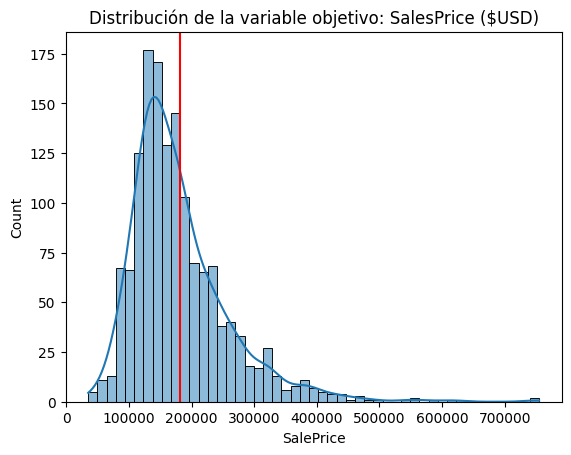

In [11]:
import seaborn as sns 

y = all_data_df['SalePrice']
ax = sns.histplot(y, kde=True)
ax.set_title('Distribución de la variable objetivo: SalesPrice ($USD)')
ax.axvline(y.mean(), color='red')

Text(0.5, 1.0, 'Distribución de la variable objetivo: SalePrice')

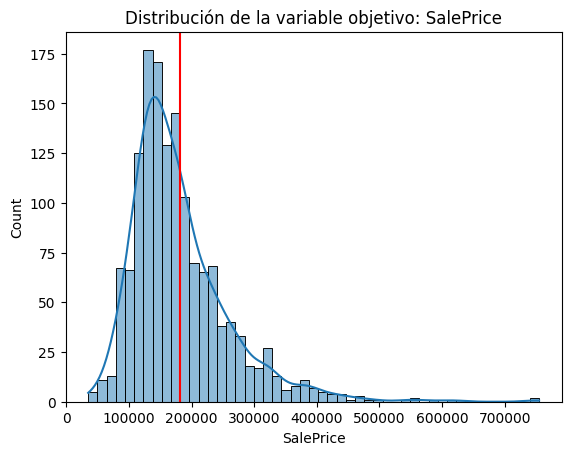

In [12]:
import seaborn as sns


y = all_data_df['SalePrice']
ax = sns.histplot(y, kde=True)
ax.axvline(y.mean(), color='red')
ax.set_title('Distribución de la variable objetivo: SalePrice')



6. Visualizar la correlación entre las variables numéricas.


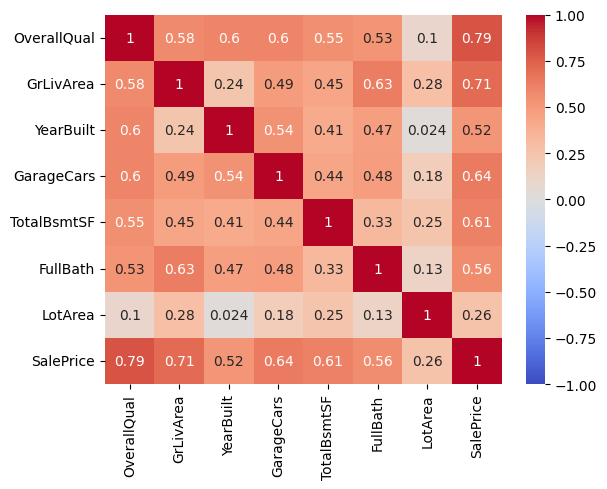

In [13]:
corr = all_data_df.corr(numeric_only=True)
ax = sns. heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


Text(0.5, 1.0, 'Matriz de correlación')

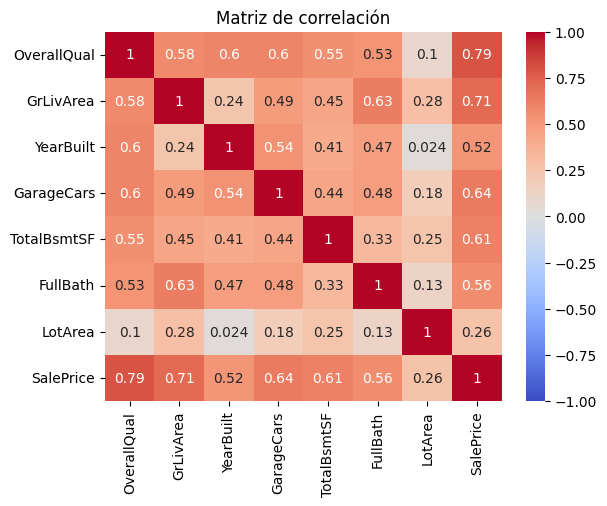

In [14]:
corr_matrix = all_data_df.corr(numeric_only=True)
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Matriz de correlación')

## 3. Preprocesamiento de los datos

Una vez que hemos explorado los datos, el siguiente paso es preprocesarlos. Para ello, seguiremos los siguientes pasos:

1. Tratar los datos nulos.
2. Codificar las variables categóricas.
3. Normalizar las variables numéricas.

In [17]:
X = all_data_df.drop(columns='SalePrice')
y = all_data_df['SalePrice']

### 3.1 Tratar los datos nulos

Vamos a ver cuantos datos nulos tenemos

In [18]:
X.isnull().sum()

OverallQual     0
GrLivArea       0
Neighborhood    0
YearBuilt       0
GarageCars      1
TotalBsmtSF     1
KitchenQual     1
FullBath        0
MSZoning        4
LotArea         0
dtype: int64

Vamos a imputar los valores nulos de las variables categóricas con la moda y los valores nulos de las variables numéricas con la media.

In [19]:
def fill_na(df, column, strategy='mode', fill_value=None):
    """Imputar valores nulos según la estrategia dada."""
    if strategy == 'mode':
        df[column] = df[column].fillna(df[column].mode()[0])
    elif strategy == 'mean':
        df[column] = df[column].fillna(df[column].mean())
    elif strategy == 'median':
        df[column] = df[column].fillna(df[column].median())
    elif strategy == 'constant':
        df[column] = df[column].fillna(fill_value)
    return df

# Aplicar las imputaciones según corresponda
X = fill_na(X, 'GarageCars', strategy='constant', fill_value=0)
X = fill_na(X, 'TotalBsmtSF', strategy='constant', fill_value=0)
X = fill_na(X, 'MSZoning', strategy='mode')
X = fill_na(X, 'KitchenQual', strategy='mode')

Confirmamos que no hay valores nulos.

In [20]:
X.isnull().sum()

OverallQual     0
GrLivArea       0
Neighborhood    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
KitchenQual     0
FullBath        0
MSZoning        0
LotArea         0
dtype: int64

### 3.2 Normalizar las variables numéricas

Normalizar las variables numéricas es un paso importante en el preprocesamiento de los datos ya que permite que las variables tengan la misma escala, evitando que unas variables tengan más peso que otras en el modelo de Machine Learning. Para ello, utilizaremos el `StandardScaler` de `scikit-learn`.

El `StandardScaler` transforma las variables de forma que tengan media 0 y desviación estándar 1. Se diferencia del `MinMaxScaler` en que no transforma las variables a un rango específico, sino que las normaliza.

Veamos las variables numéricas que vamos a normalizar.

In [21]:
X.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1971.312778,1.766016,1051.417266,1.568003,10168.114080
std,1.409947,506.051045,30.291442,0.762196,441.120498,0.552969,7886.996359
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.000000,2.000000,9453.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000


Vamos a normalizar las variables numéricas utilizando el `StandardScaler`.

In [22]:
#seleccionar ciertas columnas númericas
numeric_columns = ["GrLivArea", "YearBuilt", "TotalBsmtSF", "LotArea"]
X_numeric_df = X[numeric_columns]
print(X_numeric_df.head())


         GrLivArea  YearBuilt  TotalBsmtSF  LotArea
train 0       1710       2003        856.0     8450
      1       1262       1976       1262.0     9600
      2       1786       2001        920.0    11250
      3       1717       1915        756.0     9550
      4       2198       2000       1145.0    14260


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_numeric_scaled_data = scaler.fit_transform(X_numeric_df)
minmax_scaler = MinMaxScaler()
X_numeric_normalized = minmax_scaler.fit_transform(X_numeric_df)
X_numeric_scaled_data 

array([[ 0.41354722,  1.0462576 , -0.44307791, -0.21787869],
       [-0.47189065,  0.154764  ,  0.47746322, -0.07204408],
       [ 0.56375543,  0.98022103, -0.29796798,  0.13719688],
       ...,
       [-0.54699476, -0.3735285 ,  0.3913042 ,  1.24680804],
       [-1.0490064 ,  0.6830565 , -0.31610672,  0.0346054 ],
       [ 0.98671012,  0.71607478, -0.12564993, -0.06862014]])

In [25]:
# keep indexes "train" and "test" to split the data later
X_numeric_scaled_df = pd.DataFrame(
    X_numeric_scaled_data,
    index=X_numeric_df.index,
    columns=X_numeric_df.columns,
)
X_numeric_scaled_df.head()

GrLivArea  YearBuilt  TotalBsmtSF   LotArea
train 0   0.413547   1.046258    -0.443078 -0.217879
      1  -0.471891   0.154764     0.477463 -0.072044
      2   0.563755   0.980221    -0.297968  0.137197
      3   0.427382  -1.859351    -0.669812 -0.078385
      4   1.378042   0.947203     0.212184  0.518903

In [27]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

numeric_columns = ["GrLivArea", "YearBuilt", "TotalBsmtSF", "LotArea"]
X_numeric_df = X[numeric_columns]
X_numeric_scaled_data = scaler.fit_transform(X_numeric_df)

# keep indexes "train" and "test" to split the data later
X_numeric_scaled_df = pd.DataFrame(
    X_numeric_scaled_data,
    index=X_numeric_df.index,
    columns=X_numeric_df.columns,
)
X_numeric_scaled_df.head()

GrLivArea  YearBuilt  TotalBsmtSF   LotArea
train 0   0.413547   1.046258    -0.443078 -0.217879
      1  -0.471891   0.154764     0.477463 -0.072044
      2   0.563755   0.980221    -0.297968  0.137197
      3   0.427382  -1.859351    -0.669812 -0.078385
      4   1.378042   0.947203     0.212184  0.518903

### 3.3 Codificar las variables categóricas

Recordemos que las variables categóricas deben ser codificadas para poder ser utilizadas en un modelo de Machine Learning. Para ello, utilizaremos el `LabelEncoder` de `scikit-learn`. Primero veamos cuales son las variables categóricas.

In [28]:
from sklearn.preprocessing import LabelEncoder


def label_encode_column(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [29]:
X = label_encode_column(X, 'Neighborhood')
X = label_encode_column(X, 'MSZoning')
X = label_encode_column(X, 'KitchenQual')
X.head()

OverallQual  GrLivArea  Neighborhood  YearBuilt  GarageCars  \
train 0            7       1710             5       2003         2.0   
      1            6       1262            24       1976         2.0   
      2            7       1786             5       2001         2.0   
      3            7       1717             6       1915         3.0   
      4            8       2198            15       2000         3.0   

         TotalBsmtSF  KitchenQual  FullBath  MSZoning  LotArea  
train 0        856.0            2         2         3     8450  
      1       1262.0            3         2         3     9600  
      2        920.0            2         2         3    11250  
      3        756.0            2         1         3     9550  
      4       1145.0            2         2         3    14260

Veamos cómo han quedado codificadas las variables categóricas.

In [30]:
categorical_columns = [
    "OverallQual",
    "GarageCars",
    "Neighborhood",
    "MSZoning",
    "KitchenQual",
    "FullBath",
]
categorical_df = X[categorical_columns]
categorical_df.head()

OverallQual  GarageCars  Neighborhood  MSZoning  KitchenQual  \
train 0            7         2.0             5         3            2   
      1            6         2.0            24         3            3   
      2            7         2.0             5         3            2   
      3            7         3.0             6         3            2   
      4            8         3.0            15         3            2   

         FullBath  
train 0         2  
      1         2  
      2         2  
      3         1  
      4         2

Ahora vamos a unir todas las variables en un solo DataFrame.

In [31]:
X_clean_df = pd.concat([X_numeric_scaled_df, categorical_df], axis=1)
X_clean_df

GrLivArea  YearBuilt  TotalBsmtSF   LotArea  OverallQual  \
train 0      0.413547   1.046258    -0.443078 -0.217879            7   
      1     -0.471891   0.154764     0.477463 -0.072044            6   
      2      0.563755   0.980221    -0.297968  0.137197            7   
      3      0.427382  -1.859351    -0.669812 -0.078385            7   
      4      1.378042   0.947203     0.212184  0.518903            8   
...               ...        ...          ...       ...          ...   
test  1454  -0.807883  -0.043346    -1.145954 -1.043937            4   
      1455  -0.807883  -0.043346    -1.145954 -1.049263            4   
      1456  -0.546995  -0.373528     0.391304  1.246808            5   
      1457  -1.049006   0.683057    -0.316107  0.034605            5   
      1458   0.986710   0.716075    -0.125650 -0.068620            7   

            GarageCars  Neighborhood  MSZoning  KitchenQual  FullBath  
train 0            2.0             5         3            2         2  
      1            2.0            24         3            3         2  
      2            2.0             5         3            2         2  
      3            3.0             6         3            2         1  
      4            3.0            15         3            2         2  
...                ...           ...       ...          ...       ...  
test  1454         0.0            10         4            3         1  
      1455         1.0            10         4            3         1  
      1456         2.0            11         3            3         1  
      1457         0.0            11         3            3         1  
      1458         3.0            11         3            3         2  

[2919 rows x 10 columns]

## 4. Split de los datos

Al estar en Kaggle y tener los datos de entrenamiento y test separados, no necesitamos dividir los datos en entrenamiento y test. Sin embargo, **vamos a dividir los datos de entrenamiento en entrenamiento y validación** para poder evaluar el rendimiento de nuestro modelo.

In [32]:
from sklearn.model_selection import train_test_split


SPLIT_RATIO = 0.2
SEED = 42


# estos son los datos limpios que usaremos para predecir y enviar a Kaggle
X_test = X_clean_df.xs('test')

# estos son los datos que usaremos para entrenar y validar nuestro modelo
X_train = X_clean_df.xs('train')
y_train = y.loc['train']

# dividimos los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=SPLIT_RATIO, random_state=SEED
)

## 5. Entrenar un modelo

Una vez que hemos preprocesado los datos, el siguiente paso es entrenar un modelo. En este caso **se trata de un problema de regresión**, por lo que vamos a utilizar un modelo de regresión. En concreto, vamos a utilizar un **modelo de regresión lineal**. Este modelo se encuentra en la librería `scikit-learn` dentro de la clase `LinearRegression`.

In [48]:
#cambio el modelo para obtener una mejor predicción. 
from xgboost import XGBRegressor

model = XGBRegressor(random_state=SEED, n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
from sklearn.linear_model import LinearRegression


#model = LinearRegression()
#model.fit(X_train, y_train)

LinearRegression()

## 6. Evaluar el modelo

Una vez que hemos entrenado el modelo, el siguiente paso es evaluarlo. Para ello, vamos a calcular el **error cuadrático medio** (RMSE) en el conjunto de validación.

In [49]:
from sklearn.metrics import root_mean_squared_error, r2_score
y_pred = model.predict(X_val)
mse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
f"Mean Squared Error: {mse:.2f}", f"Coeficiente de determinación: {r2:.2f}"

('Mean Squared Error: 27244.21', 'Coeficiente de determinación: 0.90')

## 7. Envío de los datos

Finalmente, una vez que hemos entrenado y evaluado el modelo, el último paso es predecir los precios de las casas en el conjunto de test y enviar los resultados a Kaggle para obtener la puntuación final.

¡Vamos a por ello! 🚀

El archivo `sample_submission.csv` contiene el formato en el que debemos enviar nuestras predicciones. Vamos a cargarlo para ver cómo debemos estructurar nuestros datos.

In [50]:
SAMPLE_SUBMISSION_CSV = '../data/sample_submission.csv'
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_CSV)
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Vemos que tiene 2 columnas: `Id` y `SalePrice`. `Id` es el identificador de la casa y `SalePrice` es el precio que debemos predecir. vamos a obtener las predicciones de nuestro modelo y a guardarlas en un DataFrame con esas columnas.

In [53]:
test_predictions = model.predict(X_test)
test_ids = test_df['Id']
submission_data = {
    'Id': test_ids,
    'SalePrice': test_predictions,
}
submission_df = pd.DataFrame(submission_data)
submission_df.head()

,Id,SalePrice
0,1461,121619.765625
1,1462,162625.718750
2,1463,164691.015625
3,1464,188802.578125
4,1465,207996.218750


Guardamos las predicciones en un archivo CSV para enviar a Kaggle.

In [54]:
submission_df.to_csv('../data/submission.csv', index=False)